In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('C:\\Users\\guilh_000\Documents\\tweetsclassify\\train.csv', encoding='latin-1')

print(train.shape)

(99989, 3)


In [3]:
train['Sentiment'].value_counts()

1    56457
0    43532
Name: Sentiment, dtype: int64

In [9]:
pd.options.display.max_colwidth = 100
train.tail(10)

,ItemID,Sentiment,SentimentText
99979,99991,1,@cunningstunts till i can go home been here till saturday x
99980,99992,1,@cunningstunts22 afternoon jim hows you x
99981,99993,0,@cup_a_tea The foot is really bad. Like the worst it's ever been. I can barely walk right now.
99982,99994,1,@Cup_Of_Katy Have fun doing health &amp; safety :S Just switch off and look spritely XXX
99983,99995,0,@cupati It took me waaay too long to get your message about being ashamed...right now I really a...
99984,99996,0,@Cupcake seems like a repeating problem hope you're able to find something.
99985,99997,1,"@cupcake__ arrrr we both replied to each other over different tweets at the same time , i'll se..."
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had more fun with me.
99988,100000,1,@cupcake_kayla haha yes you do


In [11]:
from textblob import TextBlob
def lemmatize_with_postag(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J":'a',"N":'n',"V":'v',"R":'r'}
    words_and_tags = [(w, tag_dict.get(pos[0],'n'))for w, pos in sent.tags]
    lemmatized_list = [wd.lemmatize(tag)for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

import string
import nltk
from nltk.corpus import stopwords
import re
def normalizer(tweet):
    punct = list(string.punctuation)
    stop_words = stopwords.words('english')
    additional_stop_words = ['RT','rt','via','...','http','twitpic','tinyurl','www', 'amp']
    stopword_list = punct + stop_words + additional_stop_words
    
    tweet = re.sub("(#[A-Za-z0-9]+)",  "", tweet)           # Replace pattern # -> ' '
    tweet = re.sub("(@[A-Za-z0-9]+)", " ", tweet)
    tweet_ = re.sub("(\w+:\/\/\S+)", " ", tweet)
    tweet__ = re.sub("[^a-zA-Z]", " ", tweet_)
    lemmatized = lemmatize_with_postag(tweet__)
    tokens = nltk.word_tokenize(lemmatized)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stopword_list, lower_case))
    return filtered_result

In [12]:
train['normalized'] = train.SentimentText.apply(normalizer)
train['normal'] = [' '.join(map(str, l)) for l in train['normalized']]

In [13]:
train.tail(20)

,ItemID,Sentiment,SentimentText,normalized,normal
99969,99981,0,@CTerry1985 Sorry,[],
99970,99982,0,"@CTerry1985 damn it, dont have sky","[dont, sky]",dont sky
99971,99983,0,@CTerry1985 That's the thing; the new raft of Star Wars films were just a raft of #EpicFail s,"[thing, new, raft, star, wars, film, raft]",thing new raft star wars film raft
99972,99984,1,@cthagod,[],
99973,99985,1,@ctham #FollowFriday,[],
99974,99986,0,"@ctham #awaresg You are not wrong. But from a my own male point of view, I felt excluded (even w...","[wrong, male, point, view, felt, exclude, even, non, reply, thread]",wrong male point view felt exclude even non reply thread
99975,99987,0,@ctham @mommyfizz cuz you big burly man. hahahahahahahahaha,"[big, burly, man, hahahahahahahahaha]",big burly man hahahahahahahahaha
99976,99988,1,@ctham @Wilsurn Trying to get a wider range of shirts to suit everyone. Please make requests if ...,"[get, wider, range, shirt, suit, everyone, please, make, request, need]",get wider range shirt suit everyone please make request need
99977,99989,1,@ctham Haha I love the passion in your support,"[love, passion, support]",love passion support
99978,99990,1,"@cthulhullahoop That sucks...I like living in Coopersville, I don't need no special bags or anyt...","[like, live, coopersville, need, special, bag, anything]",like live coopersville need special bag anything


In [14]:
train['normal'].replace('', np.nan, inplace=True)
train.dropna(subset=['normal'], inplace=True)
#train.tail(20)

In [15]:
train['Sentiment'].value_counts()

1    52249
0    41414
Name: Sentiment, dtype: int64

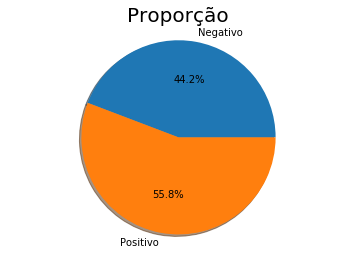

In [17]:
labels = ['Negativo', 'Positivo']
sizes = [train['Sentiment'].value_counts()[0],
         train['Sentiment'].value_counts()[1]
        ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.title('Proporção', fontsize=20)
plt.show()

In [134]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer  

#count_vectorizer = CountVectorizer(ngram_range=(1,2))
#vectorized_data =count_vectorizer.fit_transform(train['normal'])

#tfidfconverter = TfidfTransformer()  
#tfid_data = tfidfconverter.fit_transform(vectorized_data)

#indexed_data =hstack((np.array(range(0,tfid_data.shape[0]))[:,None],tfid_data))

vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 2))
final_features = vectorizer.fit_transform(train['normal'])
final_features.shape

#indexed_data =hstack((np.array(range(0,vectorized_data.shape[0]))[:,None],vectorized_data))

(93663, 26402)

In [135]:
targets = train.iloc[:, 1]

from sklearn.model_selection import train_test_split 
data_train, data_test, targets_train, targets_test =train_test_split(final_features, targets, test_size=0.2,random_state=100)
data_train_index = data_train[:,0]
data_train = data_train[:,1:]
data_test_index = data_test[:,0]
data_test = data_test[:,1:]

In [89]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbc = MultinomialNB(fit_prior=True, alpha=1.0).fit(data_train, targets_train)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nb_pred = nbc.predict(data_test)

print(confusion_matrix(targets_test, nb_pred))
print(classification_report(targets_test,nb_pred))
print(accuracy_score(targets_test, nb_pred))

[[5285 2940]
 [2567 7941]]
              precision    recall  f1-score   support

           0       0.67      0.64      0.66      8225
           1       0.73      0.76      0.74     10508

    accuracy                           0.71     18733
   macro avg       0.70      0.70      0.70     18733
weighted avg       0.70      0.71      0.71     18733

0.7060267976298511


In [91]:
#CHECK BEST PARAMETERS ONLY RUN IF FAST GPU

from sklearn.model_selection import GridSearchCV
hiperparameters = {'alpha': (1.0,1.5,2.0,2.5,3.0),'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 3.0, 'fit_prior': True}
0.7077538716571627


In [96]:
#############################################################################################################
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB(fit_prior=False, alpha=3.0).fit(data_train, targets_train)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nbm_pred = nbm.predict(data_test)

print(confusion_matrix(targets_test, nbm_pred))
print(classification_report(targets_test,nbm_pred))
print(accuracy_score(targets_test, nbm_pred))

[[5273 2952]
 [2468 8040]]
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      8225
           1       0.73      0.77      0.75     10508

    accuracy                           0.71     18733
   macro avg       0.71      0.70      0.70     18733
weighted avg       0.71      0.71      0.71     18733

0.710671008380932


In [111]:
########################################################################################################
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 15):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_train, targets_train)
    pred_i = knn.predict(data_test)
    error.append(np.mean(pred_i != targets_test))

Text(0,0.5,'Mean Error')

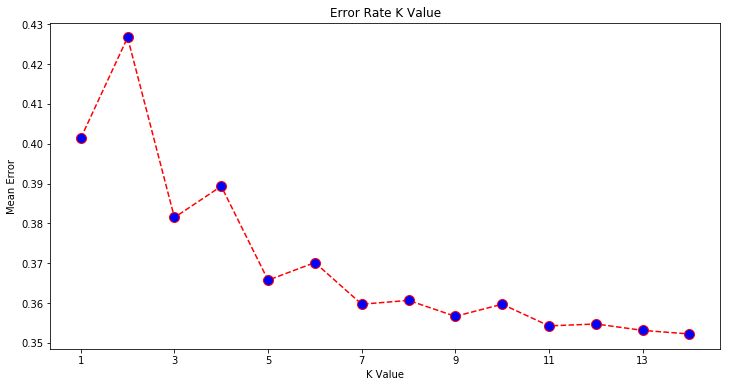

In [112]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.xticks(np.arange(1,15,2), np.arange(1,15,2))
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')

In [113]:
kn = KNeighborsClassifier(n_neighbors=13)  
kn.fit(data_train, targets_train)

KNeighborsClassifier(n_neighbors=13)

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

ky_pred = kn.predict(data_test)

print(confusion_matrix(targets_test, ky_pred))
print(classification_report(targets_test, ky_pred))
print(accuracy_score(targets_test, ky_pred))

[[3581 4644]
 [1971 8537]]
              precision    recall  f1-score   support

           0       0.64      0.44      0.52      8225
           1       0.65      0.81      0.72     10508

    accuracy                           0.65     18733
   macro avg       0.65      0.62      0.62     18733
weighted avg       0.65      0.65      0.63     18733

0.6468798377195324


In [125]:
###########################################################################################################
from sklearn import svm
clf = svm.SVC(C= 0.1, kernel='linear', gamma=1)
clf.fit(data_train, targets_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

targets_pred = clf.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[4267 3958]
 [1460 9048]]
              precision    recall  f1-score   support

           0       0.75      0.52      0.61      8225
           1       0.70      0.86      0.77     10508

    accuracy                           0.71     18733
   macro avg       0.72      0.69      0.69     18733
weighted avg       0.72      0.71      0.70     18733

0.7107777718464742


In [129]:
#########################################################
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=0)
lrc.fit(data_train, targets_train)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [130]:
targets_pred = lrc.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[4987 3238]
 [1991 8517]]
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      8225
           1       0.72      0.81      0.77     10508

    accuracy                           0.72     18733
   macro avg       0.72      0.71      0.71     18733
weighted avg       0.72      0.72      0.72     18733

0.7208669193402018


In [131]:
###################################################################################
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=100)
rfc.fit(data_train, targets_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [132]:
rfy_pred = rfc.predict(data_test)

print(confusion_matrix(targets_test, rfy_pred))
print(classification_report(targets_test, rfy_pred))
print(accuracy_score(targets_test, rfy_pred))

[[ 2136  6089]
 [  452 10056]]
              precision    recall  f1-score   support

           0       0.83      0.26      0.40      8225
           1       0.62      0.96      0.75     10508

    accuracy                           0.65     18733
   macro avg       0.72      0.61      0.57     18733
weighted avg       0.71      0.65      0.60     18733

0.6508300859445898


In [141]:
##### small tdif test
nbtdif = MultinomialNB(fit_prior=False, alpha=2.0).fit(data_train, targets_train)

In [142]:
nbm_pred = nbtdif.predict(data_test)

print(confusion_matrix(targets_test, nbm_pred))
print(classification_report(targets_test,nbm_pred))
print(accuracy_score(targets_test, nbm_pred))

[[5540 2685]
 [3030 7478]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      8225
           1       0.74      0.71      0.72     10508

    accuracy                           0.69     18733
   macro avg       0.69      0.69      0.69     18733
weighted avg       0.70      0.69      0.70     18733

0.6949233972134735


In [138]:
#CHECK BEST PARAMETERS ONLY RUN IF FAST GPU

from sklearn.model_selection import GridSearchCV
hiperparameters = {'alpha': (1.0,1.5,2.0,2.5,3.0),'fit_prior':[True, False]}
grid = GridSearchCV(MultinomialNB(), hiperparameters, cv=3)
grid.fit(data_train, targets_train)

print(grid.best_params_)
print(grid.best_score_)

{'alpha': 2.0, 'fit_prior': True}
0.6992526178750262


In [143]:
##### small tdif test

lrctdif = LogisticRegression(random_state=0)
lrctdif.fit(data_train, targets_train)

C:\Users\guilh_000\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [145]:
targets_pred = lrctdif.predict(data_test)

print(confusion_matrix(targets_test, targets_pred))
print(classification_report(targets_test,targets_pred))
print(accuracy_score(targets_test, targets_pred))

[[4748 3477]
 [1932 8576]]
              precision    recall  f1-score   support

           0       0.71      0.58      0.64      8225
           1       0.71      0.82      0.76     10508

    accuracy                           0.71     18733
   macro avg       0.71      0.70      0.70     18733
weighted avg       0.71      0.71      0.71     18733

0.7112582074414135


In [152]:
tweettotest = ['Here I am listening to vengaboys', 'Great, she''s awesome', 'I hate corona beer']
y = vectorizer.fit_transform(tweettotest)
result = lrctdif.predict(y)
if(result==1):
    print('Positive')
else:
    print('Negative')

ValueError: After pruning, no terms remain. Try a lower min_df or a higher max_df.

In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report

nbm_pred = nbm.predict(data_train)

print(confusion_matrix(targets_train, nbm_pred))
print(classification_report(targets_train,nbm_pred))
print(accuracy_score(targets_train, nbm_pred))

[[28414  4775]
 [ 3633 38108]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87     33189
           1       0.89      0.91      0.90     41741

    accuracy                           0.89     74930
   macro avg       0.89      0.88      0.89     74930
weighted avg       0.89      0.89      0.89     74930

0.8877886026958495


In [165]:
tweet_test = ['hi']
x = count_vectorizer.transform(tweet_test)
result = nbm.predict(x)
if(result==1):
    print('Positive')
else:
    print('Negative')

Positive


In [119]:
###################################################
isnegative = train[train.Sentiment == 0]
print(isnegative.shape)

(41414, 5)


In [120]:
allnegative = isnegative['normal']
allnegative.head()

0                                               sad apl friend
1                                             new moon trailer
3    sooo im gunna cry dentist since suposed get crown put min
4                                                  mi bf cheat
5                                                   worry much
Name: normal, dtype: object

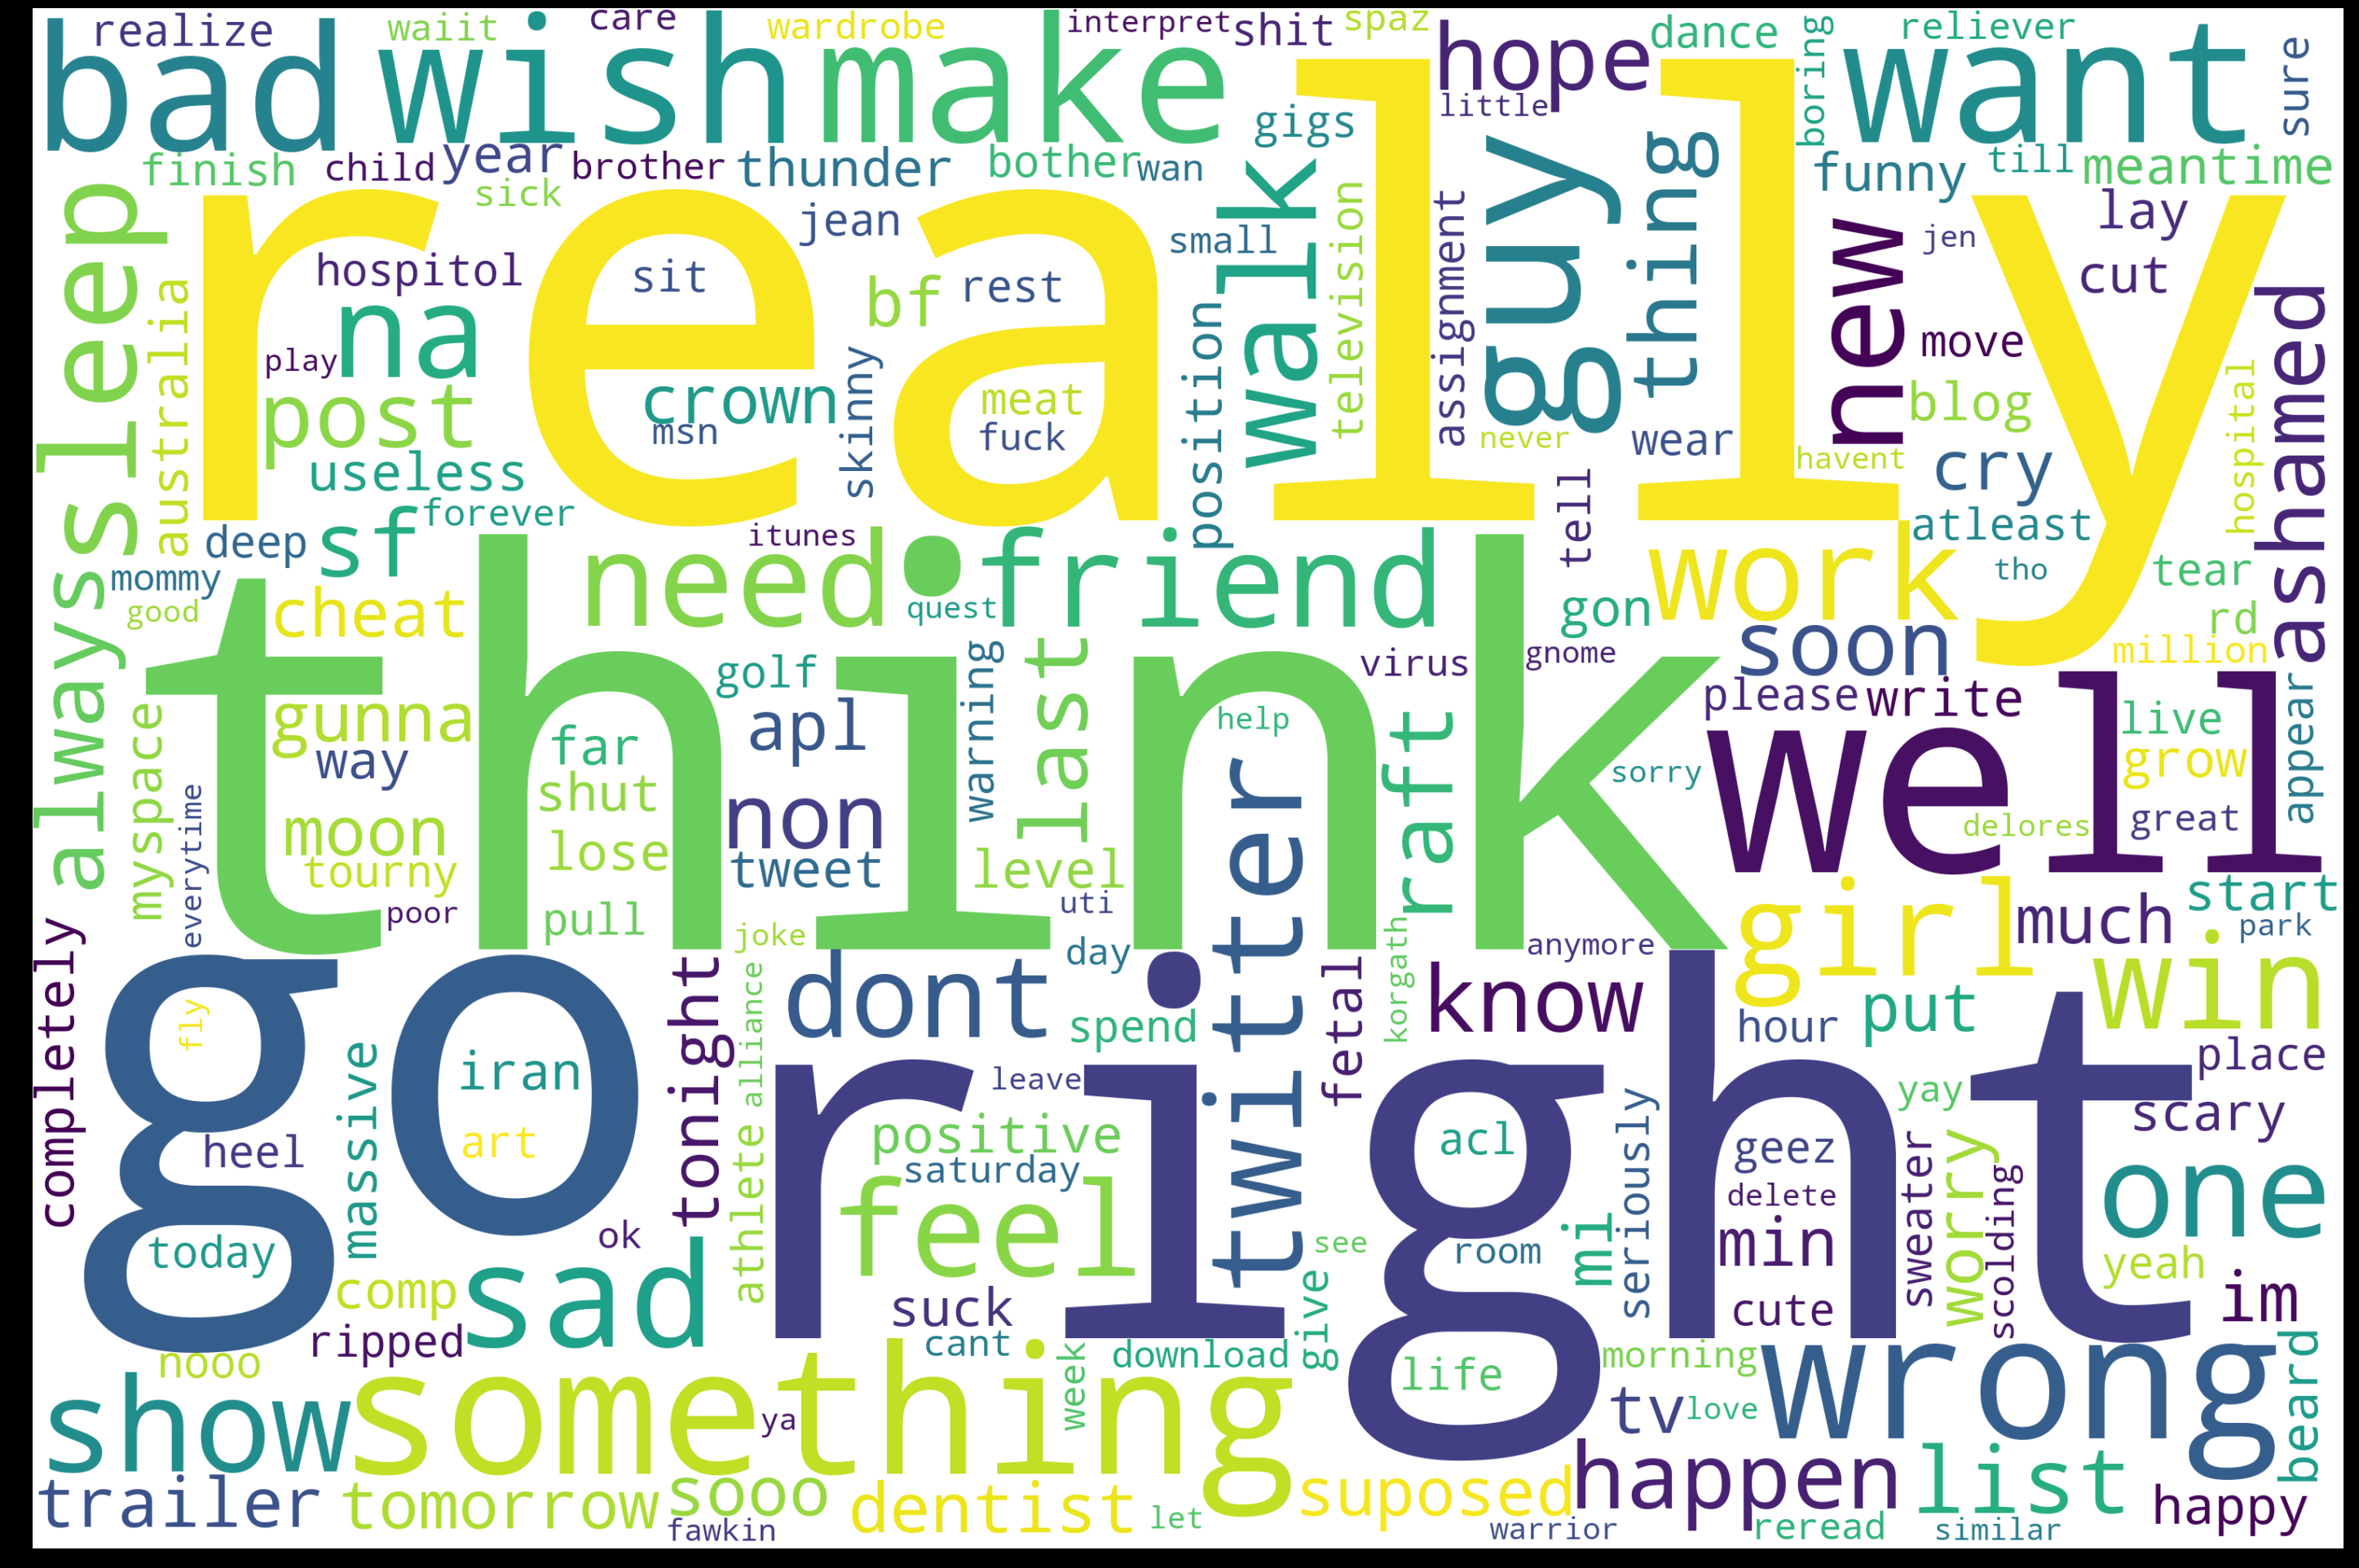

In [121]:
#build negativr wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = isnegative.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [122]:
ispositive = train[train.Sentiment == 1]
print(ispositive.shape)

(52249, 5)


In [123]:
allpositive = ispositive['normal']
allpositive.head()

2                                       already
8                    uniform today miss already
9                                 wonder number
11                               hater face day
17    fine gon na go listen semisonic celebrate
Name: normal, dtype: object

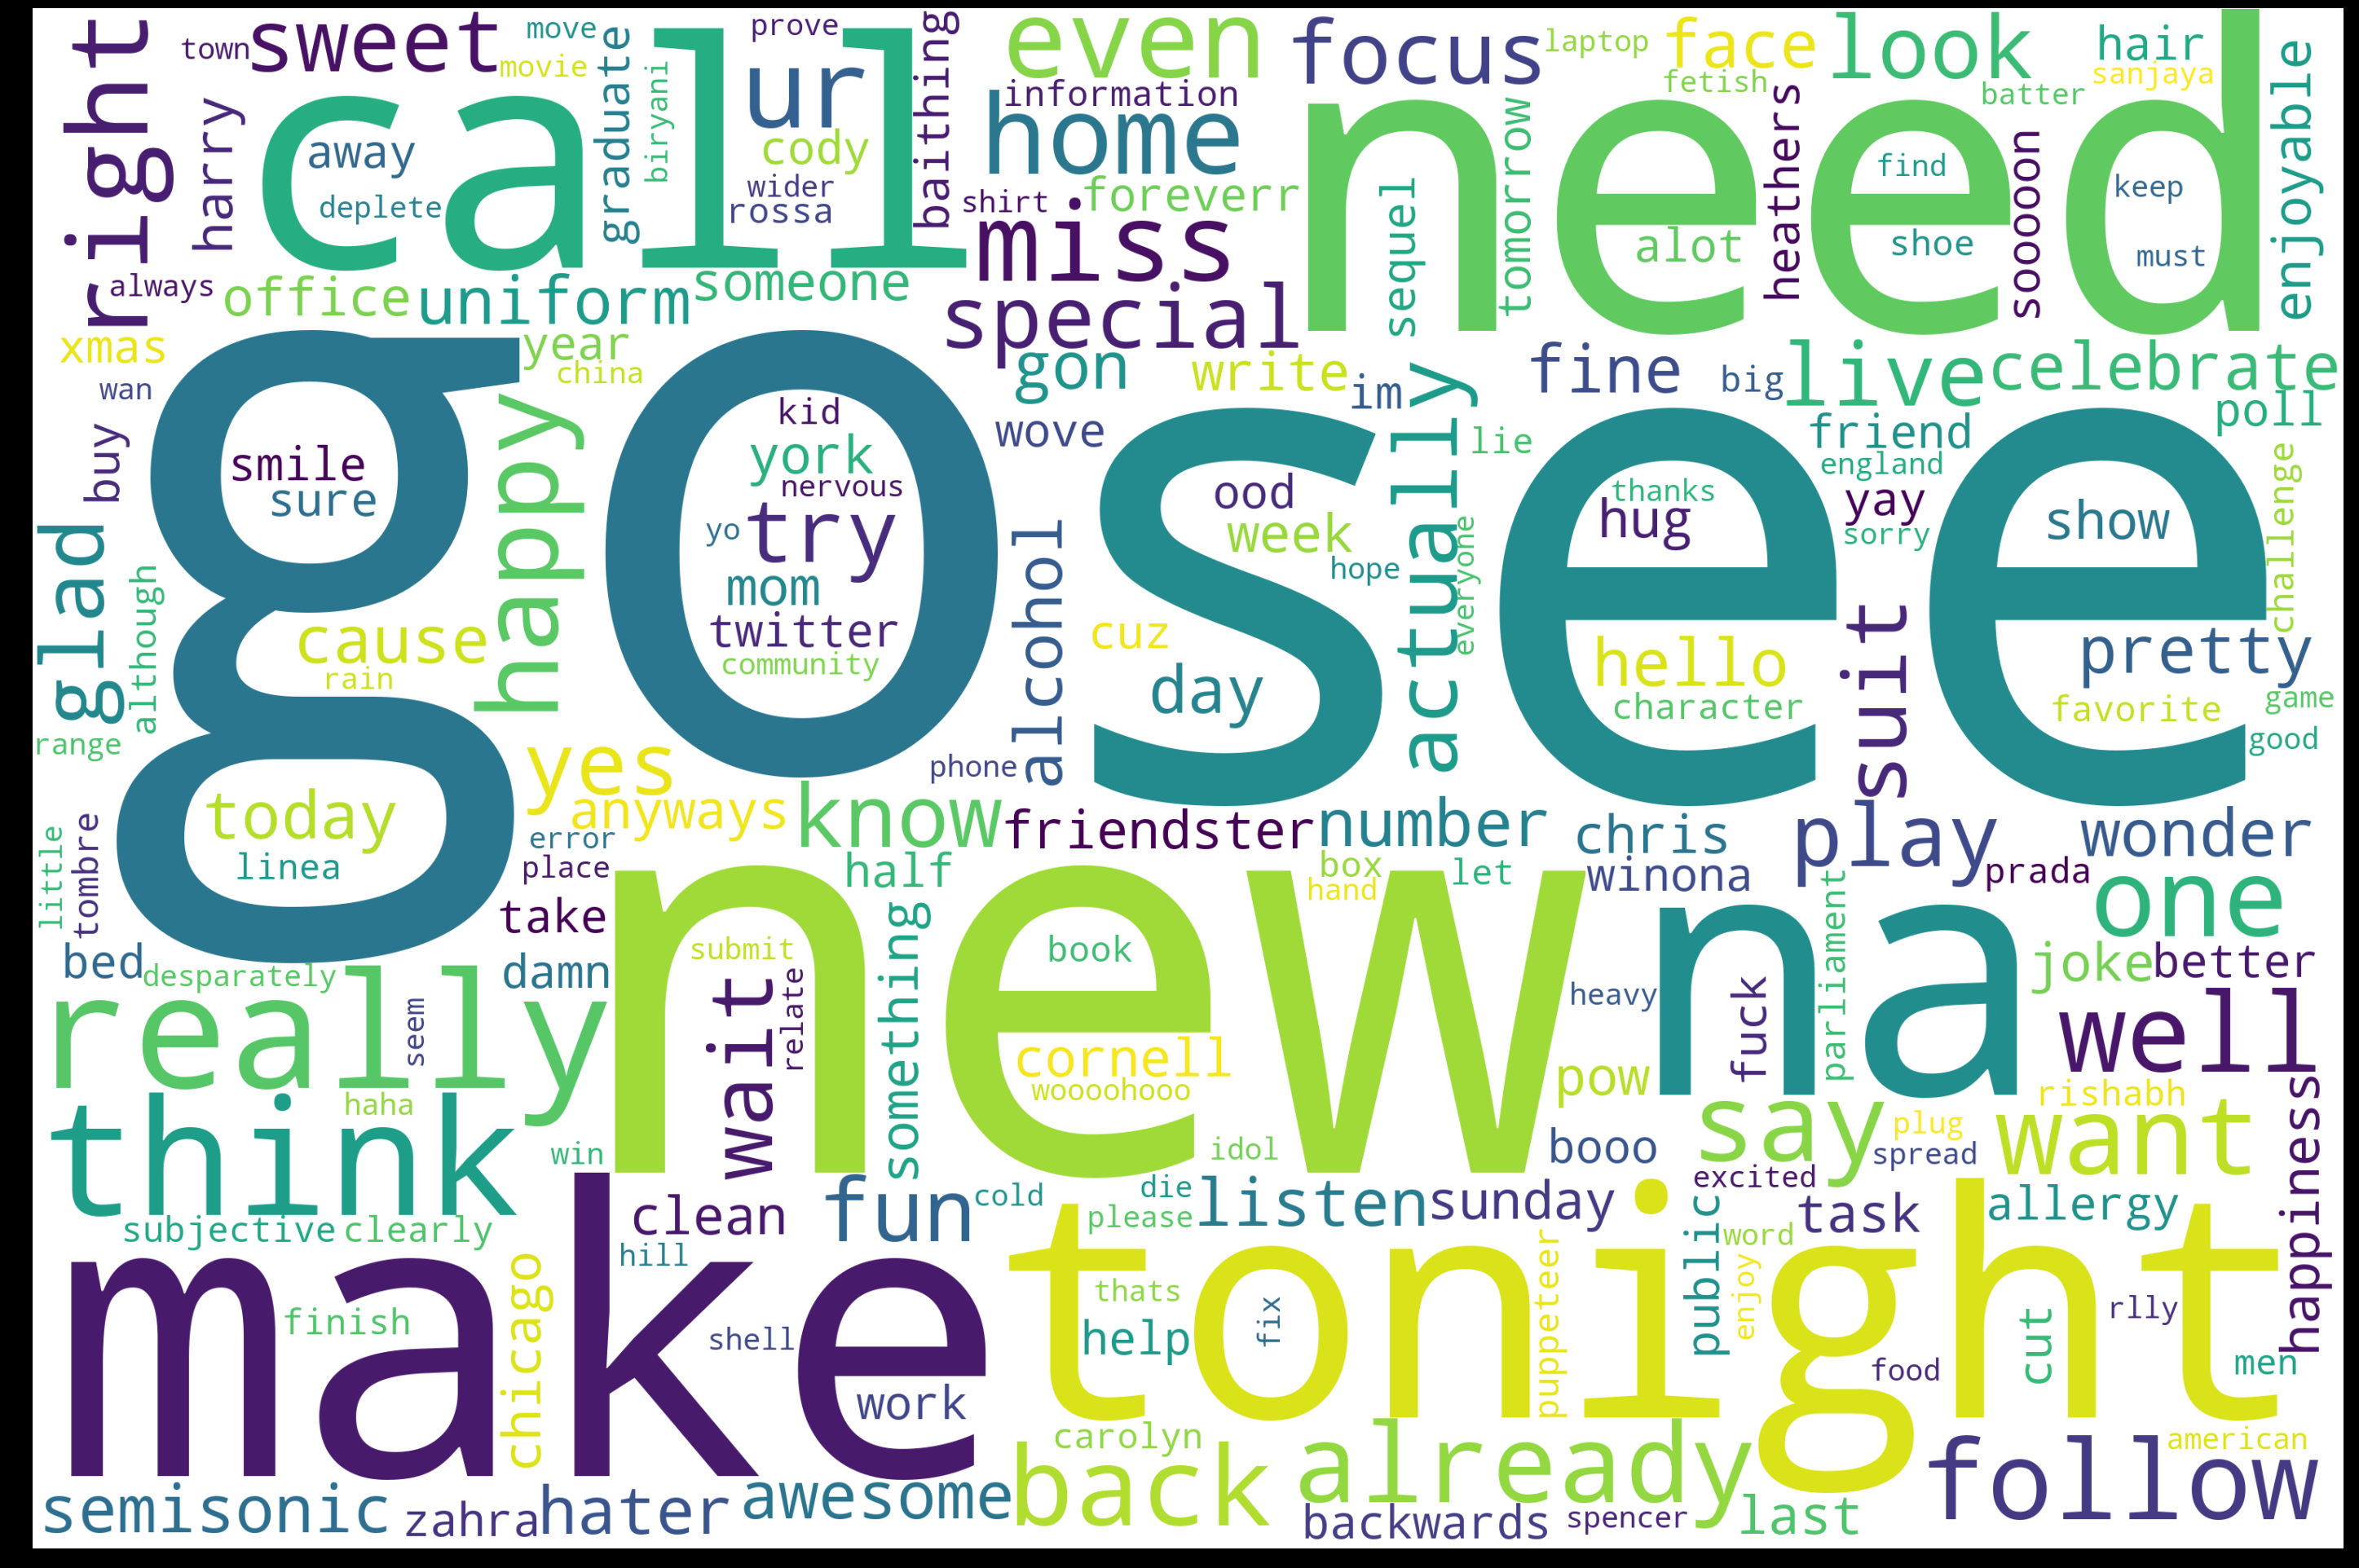

In [124]:
#build positive wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm

text = ispositive.normal
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [127]:
vectorized_data

<93663x347405 sparse matrix of type '<class 'numpy.int64'>'
	with 992399 stored elements in Compressed Sparse Row format>

In [128]:
vectorized_data.shape

(93663, 347405)

In [ ]:
#########################################################
from sklearn.linear_model import LogisticRegression
